'''
Conway's Game of Life
Game Rules link: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
'''

In [10]:
# Import libaries 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


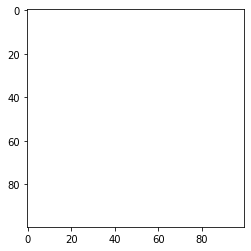

In [2]:
# Initialise the universe
universe = np.zeros((100, 100))
print(universe)

plt.imshow(universe, cmap='binary')
plt.show()

In [3]:
# Different Seeds
seeds = {
    "diehard": [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 1],
    ],
    "boat": [[1, 1, 0], [1, 0, 1], [0, 1, 0]],
    "r_pentomino": [[0, 1, 1], [1, 1, 0], [0, 1, 0]],
    "pentadecathlon": [
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1, 1, 0, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
    ],
    "beacon": [[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 1, 1], [0, 0, 1, 1]],
    "acorn": [[0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 1]],
    "spaceship": [[0, 0, 1, 1, 0], [1, 1, 0, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0]],
    "block_switch_engine": [
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0],
    ],
    "glider_gun": [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
 [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]],

 "diamond": [
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
    ],
    "infinite": [
        [1, 1, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 1, 1, 0, 1],
        [1, 0, 1, 0, 1],
    ],
}

In [4]:
# Initialise the seed


seed_array = np.array([[1,1,0],[1,0,1],[0,1,0]])

x_start, y_start = 40, 40
x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[1]
universe[x_start:x_end, y_start:y_end] = seed_array

#plt.imshow(universe, cmap='binary')
#plt.show()

In [5]:
def survival(x, y, universe):
    """
    Compute one iteration of Life for one cell.
    :param x: x coordinate of cell in the universe
    :type x: int
    :param y: y coordinate of cell in the universe
    :type y: int
    :param universe: the universe of cells
    :type universe: np.ndarray
    """
    # Count number of neighbours
    num_neighbours = np.sum(universe[x -1 : x + 2, y -1 : y + 2]) - universe[x,y]
    # The rules of Life
    if universe[x, y] and not 2 <= num_neighbours <= 3:
      return 0
    elif num_neighbours == 3:
      return 1
    return universe[x,y]
    

In [6]:
def generation(universe):
    """
    Compute one iteration of Life for the universe.
    :param universe: initial universe of cells
    :type universe: np.ndarray
    :return: updated universe of cells
    :rtype: np.ndarray
    """
    new_universe = np.copy(universe)
    # Apply the survival function to every cell in the universe
    
    for i in range(universe.shape[0]):
      for j in range(universe.shape[1]):
        new_universe[i, j] = survival(i, j, universe)    
    return new_universe

In [0]:
# will be change
# for key,values in seeds.items():
#   for v in values:
#     seed_array = np.array(v)
#     print(seed_array)
#   x_start, y_start = 40, 40
#   x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[0]
#   universe[x_start:x_end, y_start:y_end] = seed_array
#   universe = generation(universe)
# #plt.imshow(universe, cmap='binary')
# #plt.show()
# print("khan")
# print(universe)

[0 0 0 0 0 0 1 0]
[1 1 0 0 0 0 0 0]
[0 1 0 0 0 1 1 1]
[1 1 0]
[1 0 1]
[0 1 0]
[0 1 1]
[1 1 0]
[0 1 0]
[1 1 1 1 1 1 1 1]
[1 0 1 1 1 1 0 1]
[1 1 1 1 1 1 1 1]
[1 1 0 0]
[1 1 0 0]
[0 0 1 1]
[0 0 1 1]
[0 1 0 0 0 0 0]
[0 0 0 1 0 0 0]
[1 1 0 0 1 1 1]
[0 0 1 1 0]
[1 1 0 1 1]
[1 1 1 1 0]
[0 1 1 0 0]
[0 0 0 0 0 0 1 0]
[0 0 0 0 1 0 1 1]
[0 0 0 0 1 0 1 0]
[0 0 0 0 1 0 0 0]
[0 0 1 0 0 0 0 0]
[1 0 1 0 0 0 0 0]
[1 1 1 0 1]
[1 0 0 0 0]
[0 0 0 1 1]
[0 1 1 0 1]
[1 0 1 0 1]
khan
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


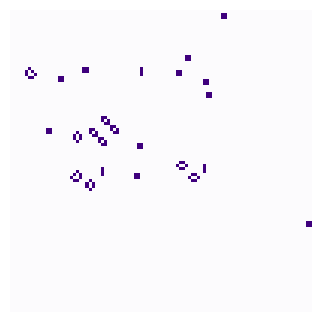

In [11]:
# For Animation
fig = plt.figure(dpi = 100) # image quality in DPI
plt.axis("off")
# number of universe iterations
n_generations = 500
ims = []
for i in range(n_generations):
    ims.append((plt.imshow(universe, cmap="Purples"),))
    universe = generation(universe)
# interval (in milliseconds) between iterations
im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000, blit=True)
im_ani.save("hello.gif", writer="imagemagick")

Seeds name diehard


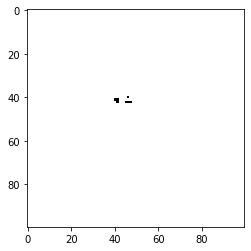

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Seeds name boat


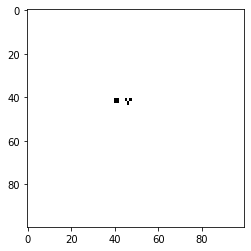

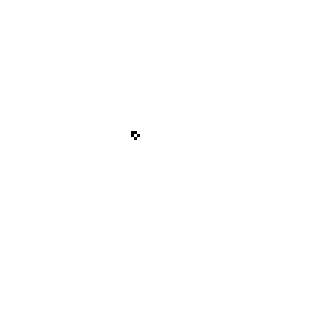

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Seeds name r_pentomino


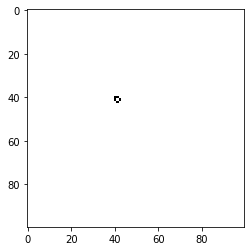

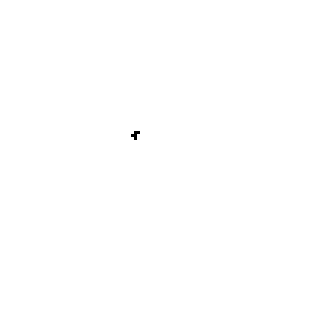

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Seeds name pentadecathlon


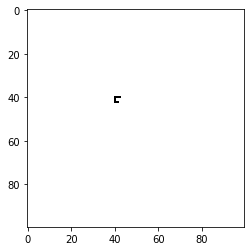

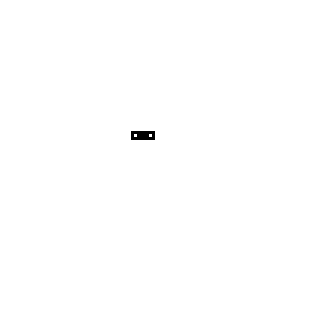

In [ ]:
for x in seeds:
  print('Seeds name', x)
  universe = np.zeros((100,100))
  seed_array = np.array(seeds[x])
  
  x_start, y_start = 40,40
  x_end, y_end = x_start + seed_array.shape[0], y_start + seed_array.shape[1]
  universe[x_start:x_end, y_start:y_end] = seed_array
  
  plt.imshow(universe, cmap='binary')
  plt.show()

  universe = generation(universe)
  plt.imshow(universe, cmap='binary')
  #plt.show()
  
  # For Animation
  # image quality in DPI
  fig = plt.figure(dpi=100) 
  plt.axis("off")
  # number of universe iterations
  n_generations = 500
  # image list to store each images
  ims = []
  for i in range(n_generations):
      ims.append((plt.imshow(universe, cmap="Purples"),))
      universe = generation(universe)
  # interval (in milliseconds) between iterations
  im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay= 2000, blit=True)
  
  filename=str(x)+'.gif'
  im_ani.save(filename, writer="imagemagick")
  